In [18]:
# Prepare env for running the tests
# Paths are relative to the root of the repository

# `./hostExample.sh` to start the webserver

# to generate env file run `source ./geant4/native-multithread/geant4.10.04.p03/install/bin/geant4.sh && printenv > ./test-python/.env`
from dotenv import dotenv_values

env_values = dotenv_values()


In [41]:
import subprocess
subprocess.call('python3 test.py', shell=True,env=env_values)



Process not running firefox
Running firefox test
Firefox [13]
24533
Firefox [{'clear': 6, 'init': 1907, 'preClear': 24522, 'preInit': 8824, 'preRun': 10731, 'run': 13791}]
Firefox 8791
Finished firefox test 41031 ms
Process not running chrome
Running chromium test
Chromium [10]
14591.70000076294
Chromium [{'clear': 19.099998474121094, 'init': 1299.8000011444092, 'preClear': 14550.400001525879, 'preInit': 2843, 'preRun': 4142.800001144409, 'run': 10407.60000038147}]
Chromium 2835.800001144409
Finished chromium test 17479 ms
Process not running exampleB1
Running native test
native run,5973

Finished native test 6301 ms
Process not running exampleB1
Running native-multithread test
native-multithread run,6850

Finished native-multithread test 7243 ms
Process not running exampleB1
Running native-multiprocess test
native run,6613

Finished native-multiprocess test 7035 ms


0

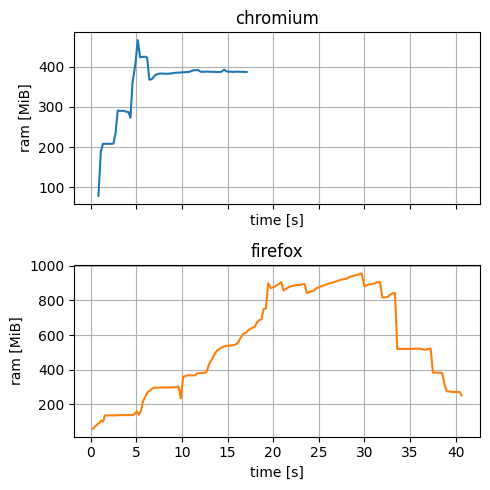

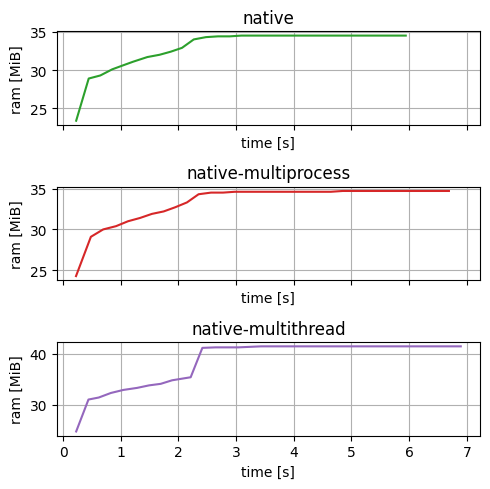

In [42]:
from parser import extract_data
import matplotlib.pyplot as plt

folder = "/data/kania/geant-wasm/geant4-wasm-performance/test-python/output/"

names_browser = ["chromium", "firefox"]
names_native = ["native", "native-multiprocess", "native-multithread"]



colors = plt.rcParams["axes.prop_cycle"]()

def plot(names):
    fig, axs = plt.subplots(len(names), 1,figsize=(5, 5), sharex=True)
    # plot each serie on subplot
    for i,name in enumerate(names):
        # extract data from file
        metadata, time_ram_pairs = extract_data(folder + name + ".log")
        # plot serie with name from metadata
        # plt.plot(
        #     [pair[0] for pair in time_ram_pairs],
        #     [pair[1] for pair in time_ram_pairs],
        #     label=metadata["name"],
        # )

        c = next(colors)["color"]

        axs[i].plot(
            [pair[0] for pair in time_ram_pairs],
            [pair[1] for pair in time_ram_pairs],
            label=metadata["name"],
            color=c
        )
        axs[i].set_ylabel("ram [MiB]")
        axs[i].set_xlabel("time [s]")
        axs[i].set_title(metadata["name"])
        axs[i].grid(True)


    fig.tight_layout()
    fig.show()

plot(names_browser)
plot(names_native)
